# LES DATAFRAMES PARTIE 2

Après ce tutoriel je serai capable de faire des:
1. fusions
2. tris
3. groupBy
4. des figures basiques avec la librairie Matplotlib
5. re-indexation des dataframes avec reset_index
6. la fonction round

Temps estimé pour ce tutoriel: ~ 2h   
Temps passé sur ce tutoriel:  

## Les données

Je vous propose de mettre de la lumière sur la réalité de l'éducation en France en comparaison avec les pays de l'OCDE.   
Nous explorons en particulier:  
  1. Le niveau des élèves
        * en écrit
        * en maths
        * en sciences
  2. Le nombre d'élèves par enseignant
  3. Le nombre d'heures d'enseignement
  4. Le salaire des enseignants (à comparer avec le salaire d'autres professions)

## Niveau des élèves 

Nous commençons par importer les données de l'année 2018 de niveau des élèves en math de l'ensemble des pays de l'OCDE. Source: https://data.oecd.org/fr/

In [181]:
import pandas as pd
niveau_math_2018 = pd.read_csv('data_education/niveau_math_2018.csv')

In [182]:
# Nous affichons le niveau des élèves français en 2018, filles, garçons et total
niveau_math_2018[niveau_math_2018['LOCATION']=='FRA']

,LOCATION,SUBJECT,TIME,NIVEAU_MATH
14,FRA,BOY,2018,499.0
15,FRA,GIRL,2018,492.0
83,FRA,TOT,2018,495.0


**Nous voulons connaitre le classement de la france**. Nous procédons comme suivant:  
1. Nous filtrons sur la colonne 'SUBJECT' pour ne prendre que 'TOT' (total)
2. Nous trions sur 'Value' de façon descendante
3. Ensuite, nous utilisons la fonction reset_index pour créer une nouvelle indexation avec le paramètre drop=True pour supprimer l'ancienne indexation
4. le calssement de la France sera l'index + 1 (ne pas oublier que l'indexation par défaut sur Python commence par 0)

In [184]:
niveau_math_2018_tot = niveau_math_2018[niveau_math_2018['SUBJECT']=='TOT']
niveau_math_2018_tot = niveau_math_2018_tot.sort_values(by= 'NIVEAU_MATH', ascending= False).reset_index(drop=True)
niveau_math_2018_tot

,LOCATION,SUBJECT,TIME,NIVEAU_MATH
0,JPN,TOT,2018,527.0
1,KOR,TOT,2018,526.0
2,EST,TOT,2018,523.0
3,NLD,TOT,2018,519.0
4,POL,TOT,2018,516.0
5,CHE,TOT,2018,515.0
6,CAN,TOT,2018,512.0
7,SVN,TOT,2018,509.0
8,DNK,TOT,2018,509.0
9,BEL,TOT,2018,508.0


**Nous volulons ensuite voir l'évolution du niveau des élèves en math sur plusieurs années.**  
1. Nous allons charger le dataset niveau_math_avant_2018.csv
2. concatener avec le dataset niveau_math_2018
3. visualiser l'évolution via les outils de viz fournis par pandas

In [187]:
# 1. charger le dataset niveau_math_avant_2018
niveau_math_avant_2018 = pd.read_csv('data_education/niveau_math_avant_2018.csv')

In [188]:
niveau_math_avant_2018.head(3)

,LOCATION,SUBJECT,TIME,NIVEAU_MATH
0,AUS,BOY,2003,527.0
1,AUS,BOY,2006,527.0
2,AUS,BOY,2009,519.0


In [189]:
# 2. concatener 
niveau_math = pd.concat([niveau_math_avant_2018, niveau_math_2018]) # A noter que la fonction concat de pandas prend en input une liste de dataframes qui possèdent les mêmmes colonnes

In [190]:
# 3. viz

# les filtres
filtre_tot = niveau_math['SUBJECT']== 'TOT'
filtre_pays = niveau_math['LOCATION']=='FRA'

niveau_math_fr = niveau_math[filtre_tot & filtre_pays ]
niveau_math_fr

,LOCATION,SUBJECT,TIME,NIVEAU_MATH
392,FRA,TOT,2003,511.0
393,FRA,TOT,2006,496.0
394,FRA,TOT,2009,497.0
395,FRA,TOT,2012,495.0
396,FRA,TOT,2015,493.0
83,FRA,TOT,2018,495.0


<AxesSubplot:xlabel='TIME'>

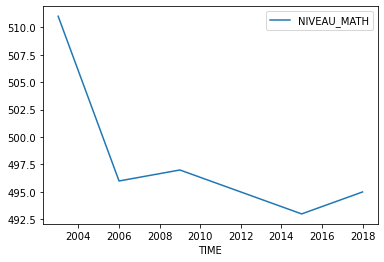

In [192]:
niveau_math_fr.plot(x= 'TIME', y= 'NIVEAU_MATH')

**Question: créer une fonction qui permet de tracer la courbe d'évolution pour chaque pays et pour chaque SUBJECT (fille/ garçon ou total)**
```python
def evolution_niveau_math(country, subject)
    ...
```

**Nous souhaitons rajouter le niveau en écrit/lecture et en sciences**
1. Nous avons à disposition deux dataset
    * niveau_science.csv
    * niveau_ecrit.csv
2. Nous fusionons ces deux jeux de données avec le dataset niveau_math
3. Nous explorons le nouveau dataset

In [199]:
# 1. charger les deux dataset
niveau_science = pd.read_csv('data_education/niveau_science.csv')
niveau_ecrit = pd.read_csv('data_education/niveau_ecrit.csv')

In [200]:
# 2. fusion
## fusion niveau_math  & niveau_science 
niveau_math_science = niveau_math.merge(niveau_science, on= ['LOCATION', 'SUBJECT', 'TIME'], how= 'inner')
## fusion niveau_math_science & niveau_ecrit
niveau_math_science_ecrit = niveau_math_science.merge(niveau_ecrit, on= ['LOCATION', 'SUBJECT', 'TIME'], how= 'inner')

In [201]:
niveau_math_science_ecrit

,LOCATION,SUBJECT,TIME,NIVEAU_MATH,NIVEAU_SCIENCE,NIVEAU_ECRIT
0,AUS,BOY,2006,527.000,527.000,495.00
1,AUS,BOY,2009,519.000,527.000,496.00
2,AUS,BOY,2012,510.115,523.728,495.09
3,AUS,BOY,2015,497.000,511.000,487.00
4,AUS,GIRL,2006,513.000,527.000,532.00
...,...,...,...,...,...,...
574,CRI,BOY,2018,411.000,420.000,419.00
575,CRI,GIRL,2018,394.000,411.000,434.00
576,LTU,TOT,2018,481.000,482.000,476.00
577,LTU,BOY,2018,480.000,479.000,457.00


**Maintenant, nous voulons faire un classement des pays en comparant le niveau général**
  1. nous filtrons sur l'année -> on fera le classement sur 2018
  2. nous filtrons sur subject -> tot
  3. nous claculons la moyenne des 3 compétences pour chaque pays

In [232]:
filtre_annee = niveau_math_science_ecrit['TIME'] == 2018
filtre_subject = niveau_math_science_ecrit["SUBJECT"] == 'TOT'
niveau_math_science_ecrit_filtree = niveau_math_science_ecrit[filtre_annee & filtre_subject]

In [233]:
# 3. calcul de la moyenne des 3 compétences
niveau_math_science_ecrit_filtree['NIVEAU_MOYEN'] = niveau_math_science_ecrit_filtree[['NIVEAU_MATH', 'NIVEAU_SCIENCE', 'NIVEAU_ECRIT' ]].mean(axis = 1).round(1)
# axis = 1 permet de calculer la moyenne sur chaque ligne, round(1) permet d'arrondir le résultat à un chiffre après la virgule

C:\Users\XQLV379\AppData\Local\Temp/ipykernel_20176/4206635697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  niveau_math_science_ecrit_filtree['NIVEAU_MOYEN'] = niveau_math_science_ecrit_filtree[['NIVEAU_MATH', 'NIVEAU_SCIENCE', 'NIVEAU_ECRIT' ]].mean(axis = 1).round(1)


**Question: Afficher le classement des pays selon le NIVEAU_MOYEN**

**Question: Comparer le niveau des filles et des garçons en France et dans les autres pays**

**Question est- il vrai que les garçons sont plus à l'aise avec les maths que les filles ?**

**Ensuite, nous aimerions voir  l'évolution du niveau des élèves dans l'ensemble des pays de l'OCDE dans les 3 compétences entre 2006 et 2018 et ce pour les filles et les garçons**

In [262]:
niveau_ocde = niveau_math_science_ecrit.groupby(['SUBJECT', 'TIME'])[['NIVEAU_MATH', 'NIVEAU_SCIENCE', 'NIVEAU_ECRIT' ]].mean().reset_index()
niveau_ocde

,SUBJECT,TIME,NIVEAU_MATH,NIVEAU_SCIENCE,NIVEAU_ECRIT
0,BOY,2006,494.000000,493.885714,464.914286
1,BOY,2009,493.750000,494.250000,469.083333
2,BOY,2012,492.969216,495.482324,472.374459
3,BOY,2015,489.681818,490.477273,474.181818
4,BOY,2018,484.400000,481.200000,466.225000
5,GIRL,2006,482.428571,491.028571,502.657143
6,GIRL,2009,482.916667,494.694444,507.972222
7,GIRL,2012,482.416054,494.332000,509.589297
8,GIRL,2015,482.522727,487.113636,500.227273
9,GIRL,2018,479.275000,483.325000,495.200000


In [263]:
import matplotlib.pyplot as plt

In [276]:
def niveau_ocde_plot(skill):
    niveau_ocde_boy = niveau_ocde[niveau_ocde.SUBJECT == 'BOY']
    niveau_ocde_girl = niveau_ocde[niveau_ocde.SUBJECT == 'GIRL']

    plt.plot(niveau_ocde_boy['TIME'], niveau_ocde_boy[skill], label='boy')
    plt.plot(niveau_ocde_girl['TIME'], niveau_ocde_girl[skill], label= 'girl')
    plt.title(f"{skill} des élèves dans l'OCDE")
    plt.legend(loc="upper left")
    plt.show()

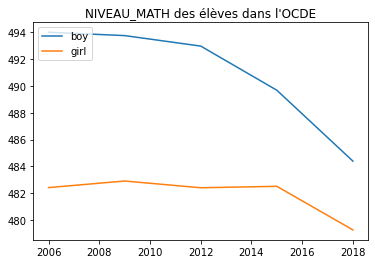

In [277]:
skill = 'NIVEAU_MATH'
niveau_ocde_plot(skill)

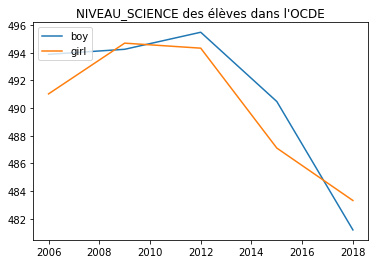

In [278]:
skill = 'NIVEAU_SCIENCE'
niveau_ocde_plot(skill)

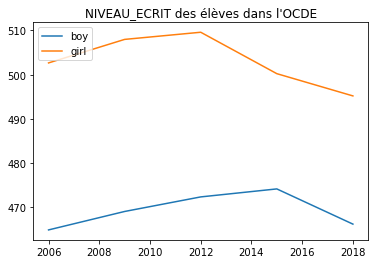

In [279]:
skill = 'NIVEAU_ECRIT'
niveau_ocde_plot(skill)

## Aller plus loin dans l'analyse.  A vous de jouer !
Pour mieux expliquer ce classement, nous allons enrichir nos donnès avec des nouveaux jeux de données:
  1. eleves_par_enseignant.csv -> nombre d'élèves par enseignant
  2. heures_enseignement.csv -> nombre d'heures d'enseignement dans l'année 
  3. salaire_enseignants.csv -> salaire moyen annuel des enseignants en $

**Exercice:**
1. charger chaque dataset et y effectuer tous les traitement nécessaire afin qu'il soit fusionnable avec le dataset niveau_math_science_ecrit:
   1. supprimer les colonnes inutile
   2. renommer les colonnes
   3. supprimer les lignes telles que 'LOCATION'== 'OAVG'

2. Explorer et analyser chaque dataset, par erxemple:
   * le pays oû les enseignants sont le mieux payés, le moins payés
   * salaire moyen de l'ensemble des pays de l'OCDE
   * afficher avec une figure l'évolution des augmentations pour les enseignants français
   * Comparaison France vs Espagne pour le nombre d'heures d'enseignement et le salaire moyen
   * etc

3. Fusionner les datasets avec le dataframe niveau_math_science_ecrit
4. Etudier les corrélations entre les différentes variables numériques
5. utiliser la librairie Matplotlib pour afficher des  figures
6. utiliser le group teams pour poser vos questions ^_^-